In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import os
import glob
import pandas as pd
import numpy as np
import pathlib

print("TensorFlow version: {}".format(tf.__version__))
print("Eager execution: {}".format(tf.executing_eagerly()))

class_names = ["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y","Z"]
model_fp = "C:\\Users\\david\\Documents\\David\\MSU\\CSC450\\hand_cnn_v1.h5"
image_fp = "C:\\Users\\david\\Documents\\David\\MSU\\CSC450\\ASL_Library\\asl_alphabet_train\\asl_alphabet_train"

TensorFlow version: 2.4.0-dev20200902
Eager execution: True


In [30]:
def createModel(num_classes):
    model = tf.keras.Sequential([
        layers.experimental.preprocessing.Rescaling(1./255),
        layers.Conv2D(32, 3, activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(32, 3, activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(32, 3, activation='relu'),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')])
    model.compile(
        optimizer='adam',
        loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy'])
    return model

In [24]:
# images = glob.glob(image_fp+"\\*\\*.jpg")
# useful_images = []
# useful_labels = []
# for image in images:
#     label = image.split('\\')[-1][0]
#     if label in class_names:
#         useful_labels.append(label)
#         useful_images.append(image)
# useful_images = useful_images / 255.0

In [26]:
def createDataset(image_fp):
    image_dir = pathlib.Path(image_fp)
    batch_size = 32
    img_height = 200
    img_width = 200

    train_ds = tf.keras.preprocessing.image_dataset_from_directory(
        image_dir,
        validation_split=0.2,
        subset="training",
        seed=123,
        image_size=(img_height, img_width),
        batch_size=batch_size)
    val_ds = tf.keras.preprocessing.image_dataset_from_directory(
        image_dir,
        validation_split=0.2,
        subset="validation",
        seed=123,
        image_size=(img_height, img_width),
        batch_size=batch_size)
    class_names = train_ds.class_names
    print(class_names)
    return train_ds, val_ds, class_names

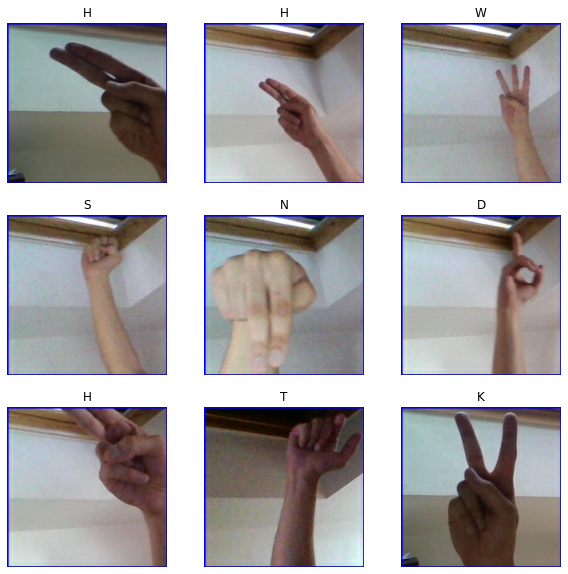

In [27]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [28]:
# (train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# # Normalize pixel values to be between 0 and 1
# train_images, test_images = train_images / 255.0, test_images / 255.0

# class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
#                'dog', 'frog', 'horse', 'ship', 'truck']

# plt.figure(figsize=(10,10))
# for i in range(25):
#     plt.subplot(5,5,i+1)
#     plt.xticks([])
#     plt.yticks([])
#     plt.grid(False)
#     plt.imshow(train_images[i], cmap=plt.cm.binary)
#     # The CIFAR labels happen to be arrays, 
#     # which is why you need the extra index
#     plt.xlabel(class_names[train_labels[i][0]])
# plt.show()

In [ ]:
train_ds, val_ds, class_names = createDataset(image_fp)
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [32]:
model = createModel(len(class_names))
history = model.fit(train_ds, validation_data=val_ds, epochs=10)
# history = model.fit(train_images, train_labels, epochs=10, 
#                     validation_data=(test_images, test_labels))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

Found 87000 files belonging to 29 classes.
Using 69600 files for training.
Found 87000 files belonging to 29 classes.
Using 17400 files for validation.
['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']
Epoch 1/10
  22/2175 [..............................] - ETA: 47:25 - loss: 3.3996 - accuracy: 0.0284

KeyboardInterrupt: 

In [ ]:
model.save(model_fp)